In [57]:
import os
os.chdir('..')

In [58]:
from multicell_utils.builder import ModelBuilder, ProcessCreator, ObjectCreator

cell_pop = ObjectCreator(
    type='CellPopulation',
    inherits_from='Cell',
    contained_objects=['Cell'],
    attributes={'number of cells': 100}
)
cell_pop.validate()
cell_pop.register(overwrite=True)
cell_pop.save(filename='cell_population.json')



Schema saved to schema/object/cell_population.json


## Make a generic model of cell sorting

In [59]:
cell_sorting = ModelBuilder(model_name='cell_sorting')

# add objects
cell_sorting.add_object(name='universe', object_type='Universe',
                        contained_objects=["environment"])
cell_sorting.add_object(name='dark', object_type='CellPopulation')
cell_sorting.add_object(name='light', object_type='CellPopulation')
cell_sorting.add_object(name='environment', object_type='MaterialObjectSpace', contained_objects=["dark", "light", "external_material"])
cell_sorting.add_object(name='external_material', object_type='Material')

# add processes
cell_sorting.add_process(name='volume exclusion', process_type='VolumeExclusion',
                    participating_objects=["dark", "light", "external_material"])
cell_sorting.add_process(name='contact',
                         process_type='ContactForce',
                         participating_objects=["dark", "light"],
                         # condition={} # point the environment
                         )
cell_sorting.add_process(name='fluctuation_dark', process_type='MotileForce', participating_objects=["dark"])
cell_sorting.add_process(name='fluctuation_light', process_type='MotileForce', participating_objects=["light"])


In [60]:
cell_sorting.validate()

In [61]:
cell_sorting.save(filename='cell_sorting.json')

Model saved to models/cell_sorting.json


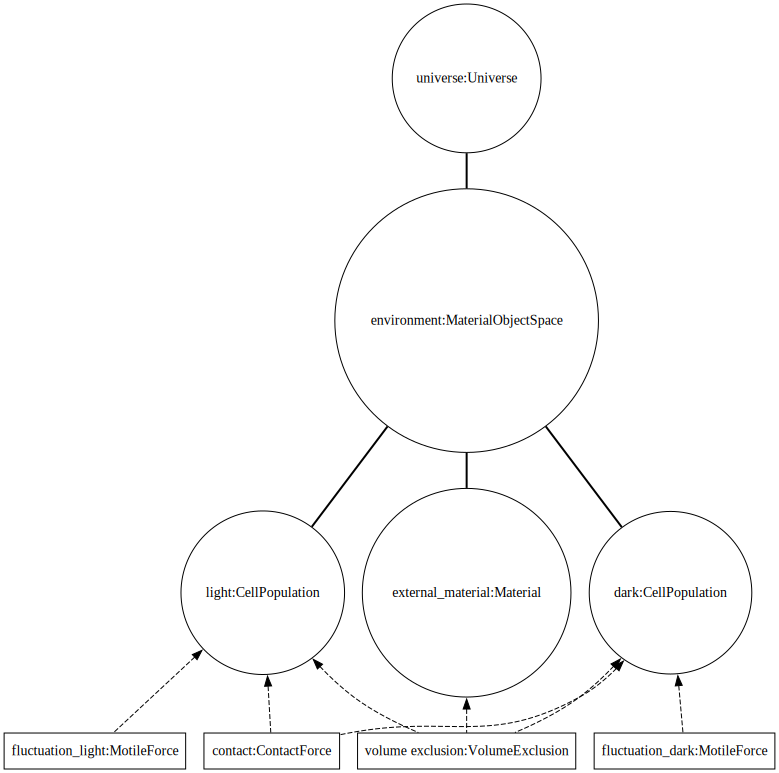

In [62]:
cell_sorting.graph()

In [63]:
cell_sorting

ModelBuilder({ 'id': 'model_000032',
  'name': 'cell_sorting',
  'objects': { 'dark': { 'attributes': {},
                         'boundary_conditions': {},
                         'contained_objects': [],
                         'type': 'CellPopulation'},
               'environment': { 'attributes': {},
                                'boundary_conditions': {},
                                'contained_objects': [ 'dark',
                                                       'light',
                                                       'external_material'],
                                'type': 'MaterialObjectSpace'},
               'external_material': { 'attributes': {},
                                      'boundary_conditions': {},
                                      'contained_objects': [],
                                      'type': 'Material'},
               'light': { 'attributes': {},
                          'boundary_conditions': {},
                       

## load generic model and modify it to cellular potts
This involves swapping out the generic processes and objects with more detailed ones.

In [64]:
cpm_cell_sorting = ModelBuilder(model_name='cpm_cell_sorting', model_file='cell_sorting.json')
# TODO -- "modify_process" to add new contained objects
# TODO -- "swap_process"/"swap_objects" to switch out general processes/objects to more detailed ones
# TODO -- "generalize" to go up in the object/process ontology
# TODO -- "specialize" uses the inheritance to create a new object with the same attributes
# cpm_cell_sorting.specialize(name='dark', version='CPMCell')
# cpm_cell_sorting.add_process(
#     name='contact',
#     process_type='ContactForce',
#     participating_objects=["dark", "light", "external_material"],
# )

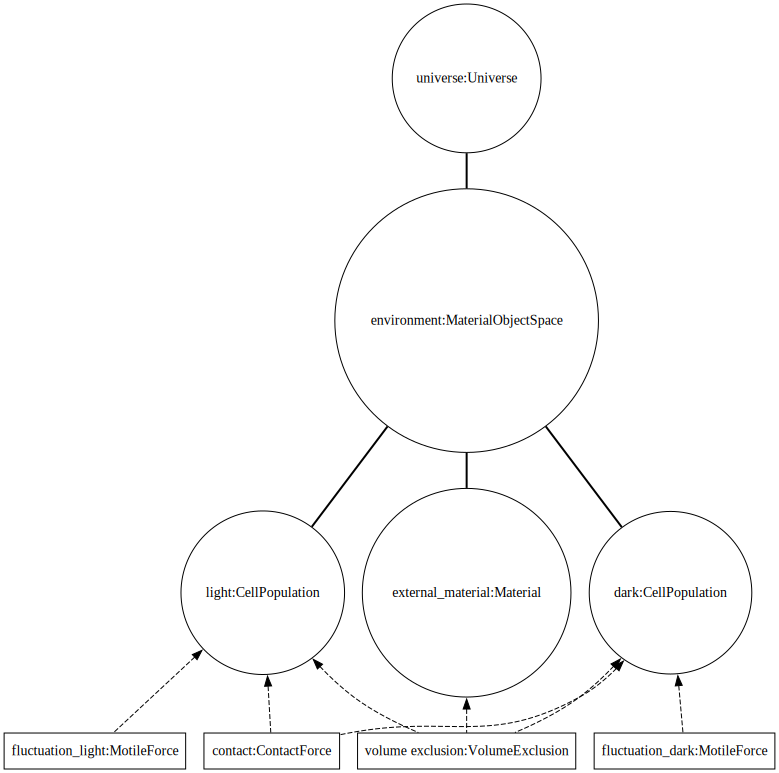

In [65]:
cpm_cell_sorting.graph()

## convert to a vertex model

In [66]:
vertex_sorting = ModelBuilder(model_name='vertex_sorting', model_file='cell_sorting.json')

# vertex_sorting.specialize(name='dark', version='VertexCell')

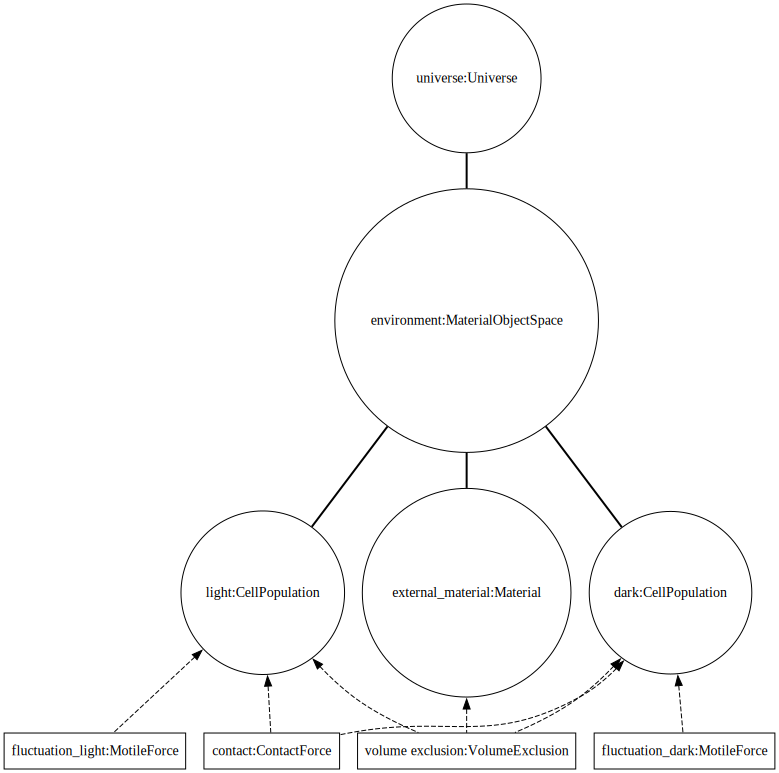

In [67]:
vertex_sorting.graph()